<a href="https://colab.research.google.com/github/anachavesv8/Bootcamp_Blue/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/train.tsv', sep = '\t')
test = pd.read_csv('/content/drive/MyDrive/Datasets/test.tsv', sep = '\t')

def data(n, seed):

    datas = []
    
    random.seed(seed)
    for i in range(n):
        dia_maximo = 30
        dia_minimo = 1
        mes_maximo = 12
        mes_minimo = 1
        
        dia = int(round(random.random() * (dia_maximo - dia_minimo) + dia_minimo, 0))
        mes = int(round(random.random() * (mes_maximo - mes_minimo) + mes_minimo, 0))
        
        datas.append(str(dia)+'-'+str(mes)+'-2018')
        
    return datas

def estoque(n, seed):

    np.random.seed(seed)
    mu, sigma = 1, 20
    s = np.random.normal(mu, sigma, n)
    s[s < 0] = s[s < 0] * -0.5
    s = s.astype(int)
    s[s < 1] = 1
    
    return s

train['date']  = data(n = train.shape[0], seed = 10)
train['stock'] = estoque(n = train.shape[0], seed = 10)

test['date']  = data(n = test.shape[0], seed = 15)
test['stock'] = estoque(n = test.shape[0], seed = 15)

train.drop('train_id', axis=1, inplace=True)
train['item_condition_id'] = train['item_condition_id'].astype('str')

A função de geração das datas gera um número aleatório de 0 até 1 multiplicado pela faixa de dias possíveis mais o dia minimo. A função original arredondava o resultado para inteiro através da utilização do método int(), este método simplesmente elimina a parte decimal de um número tornando os valores extremos (1, 12 e 30) extremamente raros. A utilização da função round() permite que os valores sejam distribuídos inclusive para os extremos.

### Objetivo: Entender o comportamento dos dados através de visualizações

Podemos dizer que a variável 'price' é a variável target, ou seja, a variável que devemos prever. Dessa forma, a maior parte desta análise exploratória envolverá esta variável.

In [ ]:
# Função inicial de tratamento das categorias e separação em colunas diferentes.

rotulos = [i for i in train['category_name'].fillna('missing/missing/missing').str.split("/")]

gen_cat = []
sub1_cat = []
sub2_cat = []

for i in range(0,len(rotulos)):
  gen_cat.append(rotulos[i][0])
  sub1_cat.append(rotulos[i][1])
  sub2_cat.append(rotulos[i][2])

train['gen_cat'] = gen_cat
train['sub1_cat'] = sub1_cat
train['sub2_cat'] = sub2_cat

del gen_cat
del sub1_cat
del sub2_cat

In [ ]:
train

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock,gen_cat,sub1_cat,sub2_cat
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,18-6-2018,27,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,18-3-2018,15,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,25-10-2018,14,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,20-3-2018,1,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,16-5-2018,13,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",13-10-2018,2,Women,Dresses,Mid-Calf
1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,6-10-2018,10,Kids,Girls 2T-5T,Dresses
1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",6-8-2018,15,Sports & Outdoors,Exercise,Fitness accessories
1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,13-2-2018,20,Home,Home Décor,Home Décor Accents


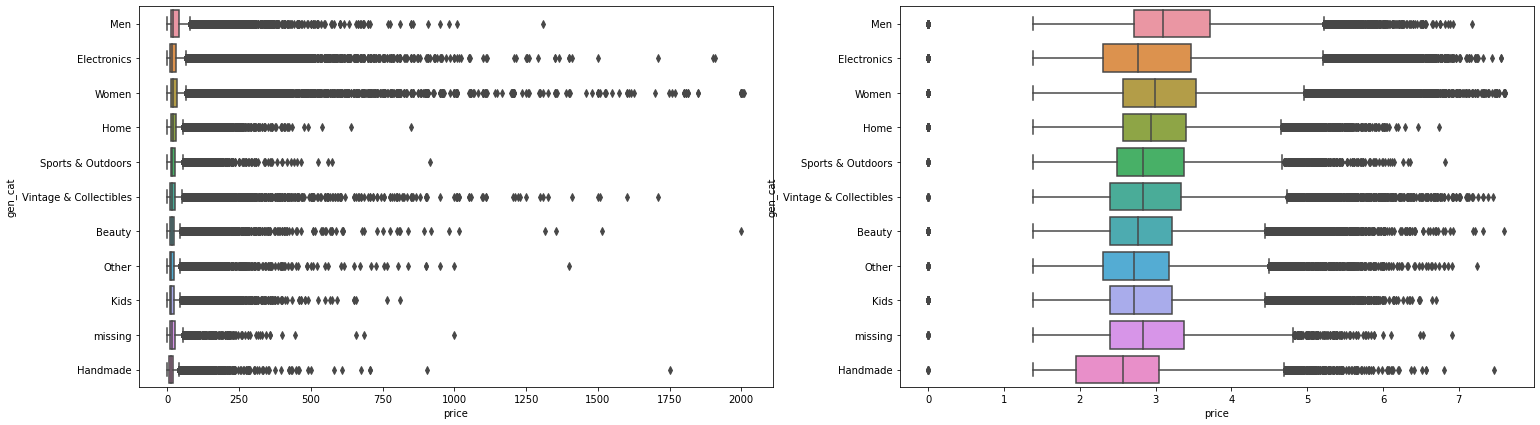

In [ ]:
# Verificação de Outliers nos preços

plt.subplots(1,2, figsize = (25,7))

plt.subplot(1,2,1)
sns.boxplot(data = train[['price', 'gen_cat']], x = 'price', y = 'gen_cat')

# Os preços possuem uma grande amplitude e dificultam a leitura em uma escala simples, a aplicação do log permite a leitura e interpretação dos valores em uma escala logaritmica.

plt.subplot(1,2,2)
sns.boxplot(data = pd.concat([train['price'].apply(lambda x: math.log(x+1)), train['gen_cat']], axis = 1), x = 'price', y = 'gen_cat')

Em ambas as visualizações notamos uma grande presença de outliers. Porém, por tratar-se de um serviço de vendas de diversos tipos de produto, espera-se que tais discrepâncias sejam naturais e por hora serão mantidas na baseline inicial.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


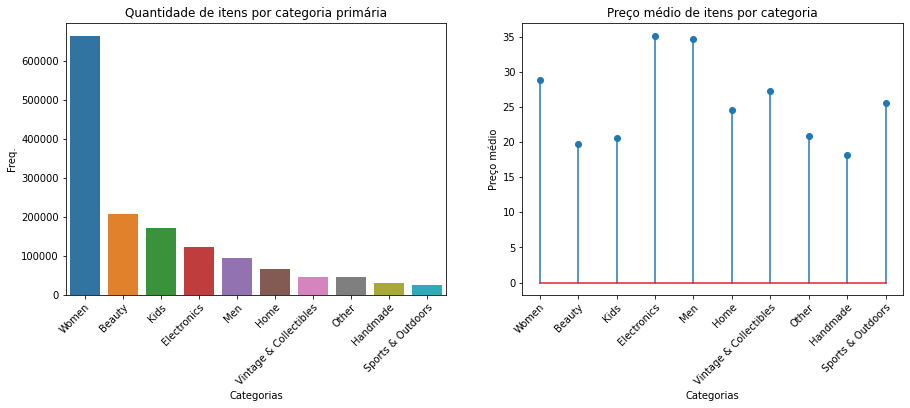

In [ ]:
x = train['gen_cat'].value_counts().reset_index()

plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=x[0:10], x = 'index', y = 'gen_cat')
plt.title('Quantidade de itens por categoria primária')
plt.xlabel('Categorias')
plt.ylabel('Freq.')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

x = train[['gen_cat','price']].groupby('gen_cat').agg(['count','mean']).reset_index().sort_values(by=('price','count'), ascending=False)

plt.subplot(1,2,2)
plt.stem(x['gen_cat'][0:10],x[('price','mean')][0:10])
plt.title('Preço médio de itens por categoria')
plt.xlabel('Categorias')
plt.ylabel('Preço médio')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

plt.show()

A frequência permite a retirada de alguns insights sobre o comportamento dos dados. Podemos ver que a variável ‘Women’ aparece numa frequência muito acima das demais e pode vir a gerar ruídos nos resultados do modelo de predição a ser desenvolvido. Além disso vemos que a destruição de preços entre as categorias não apresenta uma grande variação e a maioria está presente numa mesma faixa.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


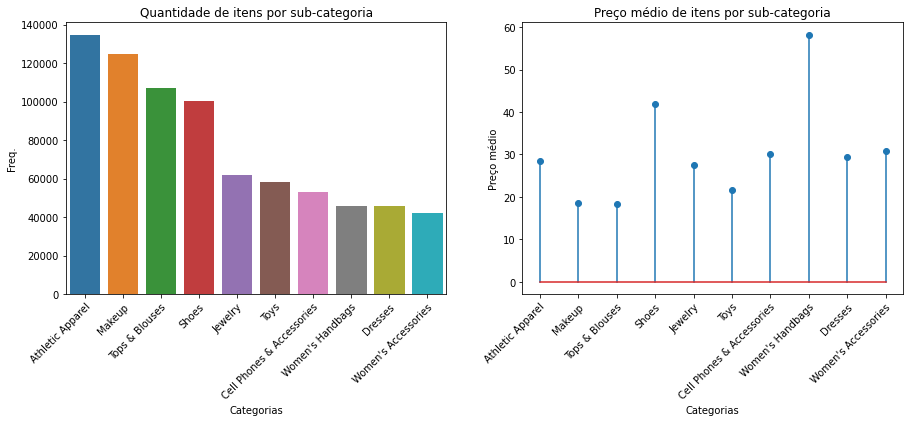

In [ ]:
x = train['sub1_cat'].value_counts().reset_index()

plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=x[0:10], x = 'index', y = 'sub1_cat')
plt.xlabel('Categorias')
plt.ylabel('Freq.')
plt.title('Quantidade de itens por sub-categoria')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

x = train[['sub1_cat','price']].groupby('sub1_cat').agg(['mean','count']).reset_index().sort_values(by=('price','count'), ascending=False)

plt.subplot(1,2,2)
plt.stem(x['sub1_cat'][0:10],x[('price','mean')][0:10])
plt.title('Preço médio de itens por sub-categoria')
plt.xlabel('Categorias')
plt.ylabel('Preço médio')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

plt.show()

A análise geral das sub-categorias mostra um equilíbrio muito mais saudável em relação ao equilíbrio das categorias principais, porém, seus preços mostram variações mais extremas.

In [ ]:
train['datetime_date'] = pd.to_datetime(train['date'], format = "%d-%m-%Y", errors = 'coerce')
train.drop('date', axis = 1, inplace=True)
train['datetime_month'] = train['datetime_date'].dt.month

In [ ]:
train[['gen_cat','price', 'datetime_month']].groupby('datetime_month').agg(['count','mean']).reset_index().sort_values(by=['datetime_month'], ascending=False)

datetime_month   price           
                    count       mean
11           12.0   67055  27.106420
10           11.0  134979  26.569626
9            10.0  134584  26.795039
8             9.0  134935  26.531641
7             8.0  134265  26.675165
6             7.0  134846  26.787973
5             6.0  134857  26.648776
4             5.0  134173  26.907828
3             4.0  135564  26.784390
2             3.0  134889  26.765437
1             2.0  127916  26.794291
0             1.0   67575  26.557558

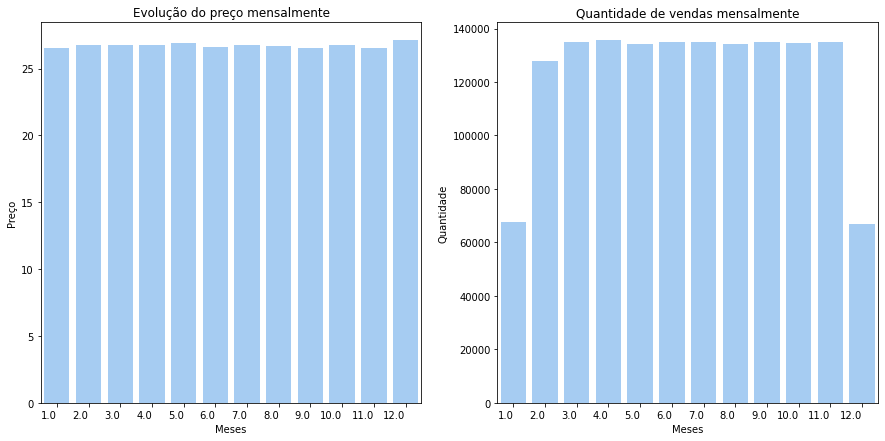

In [ ]:
x = train[['gen_cat','price', 'datetime_month']].groupby('datetime_month').agg(['count','mean']).reset_index().sort_values(by=('price','count'), ascending=False)

plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=x, x = 'datetime_month', y = ('price','mean'), color = '#99ccff')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.title('Evolução do preço mensalmente')
plt.xticks(rotation_mode='anchor', ha='right')

plt.subplot(1,2,2)
sns.barplot(data=x, x = 'datetime_month', y = ('price','count'), color = '#99ccff')
plt.xlabel('Meses')
plt.ylabel('Quantidade')
plt.title('Quantidade de vendas mensalmente')
plt.xticks(rotation_mode='anchor', ha='right')

plt.show()

A análise da variação do preço no tempo nos mostra um comportamento atípico dos dados. Não há grande variação na média geral dos preços no decorrer do ano e além disso há grandes quedas no primeiro mês e no último mês.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


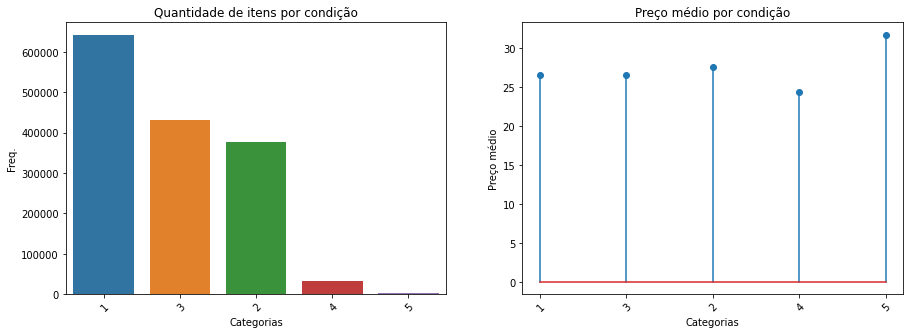

In [ ]:
x = train['item_condition_id'].value_counts().reset_index()

plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=x, x = 'index', y = 'item_condition_id')
plt.xlabel('Categorias')
plt.ylabel('Freq.')
plt.title('Quantidade de itens por condição')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

x = train[['item_condition_id','price']].groupby('item_condition_id').agg(['mean','count']).reset_index().sort_values(by=('price','count'), ascending=False)

plt.subplot(1,2,2)
plt.stem(x['item_condition_id'],x[('price','mean')])
plt.title('Preço médio por condição')
plt.xlabel('Categorias')
plt.ylabel('Preço médio')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

plt.show()

A distribuição de itens por condição nos mostra uma grande valorização de itens com qualidade 5 apesar da grande maioria pertencer a qualidade 1.

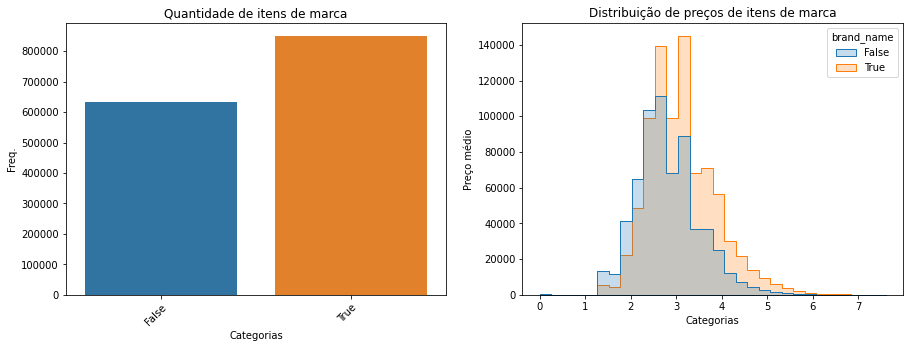

In [ ]:
x = (~train['brand_name'].isnull()).value_counts().reset_index()

plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=x, x = 'index', y = 'brand_name')
plt.xlabel('Categorias')
plt.ylabel('Freq.')
plt.title('Quantidade de itens de marca')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

# x = pd.concat([(~train['brand_name'].isnull()).astype('str'), train['price']], axis = 1).groupby('brand_name').agg(['mean','count']).reset_index().sort_values(by=('price','count'), ascending=False)

plt.subplot(1,2,2)
sns.histplot(data = train, x = train['price'].apply(lambda x: math.log(x+1)), bins = 30, hue = ~train['brand_name'].isnull(), element="step")
plt.title('Distribuição de preços de itens de marca')
plt.xlabel('Categorias')
plt.ylabel('Preço médio')

plt.show()

Apesar de haver marcas diferentes, a análise acima mostra que há uma variação considerável entre itens que possuem marcas. Isso nos abre uma possibilidade de no pré-processamento substituir as marcas por valores que indiquem ausência ou presença.

In [ ]:
train['brand_name'].value_counts()

PINK                    54088
Nike                    54043
Victoria's Secret       48036
LuLaRoe                 31024
Apple                   17322
                        ...  
The Learning Journey        1
Pampers Baby Fresh          1
Huggies One & Done          1
Classic Media               1
Kids Only                   1
Name: brand_name, Length: 4809, dtype: int64

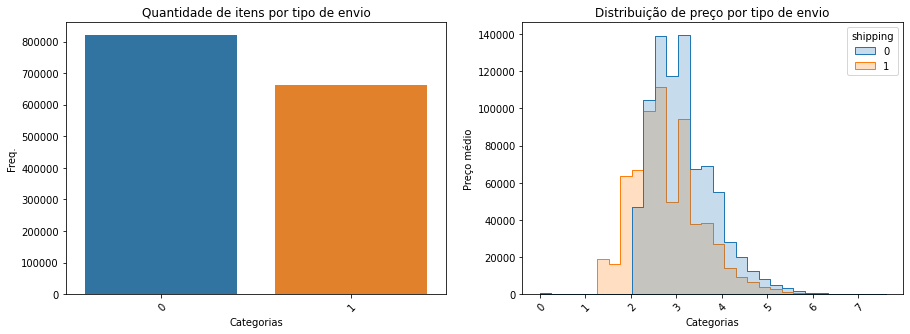

In [ ]:
x = train['shipping'].value_counts().reset_index()

plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=x, x = 'index', y = 'shipping')
plt.xlabel('Categorias')
plt.ylabel('Freq.')
plt.title('Quantidade de itens por tipo de envio')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

# x = train[['shipping','price']].groupby('shipping').agg(['mean','count']).reset_index().sort_values(by=('price','count'), ascending=False)

plt.subplot(1,2,2)
sns.histplot(x = train['price'].apply(lambda x: math.log(x+1)), bins = 30, hue = train['shipping'], element="step")
plt.title('Distribuição de preço por tipo de envio')
plt.xlabel('Categorias')
plt.ylabel('Preço médio')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

plt.show()

Além disso, o modo de cobrança do frete também influencia no preço final do produto. E, ao contrário do que se espera, o preço tende a subir quando o frete é pago pelo vendedor. Isso provavelmente acontece porque geralmente o vendedor paga o frete para vendas mais caras como forma de impulsionamento.

In [ ]:
train[train['gen_cat'] == 'Women']['sub1_cat'].unique()

array(['Tops & Blouses', 'Jewelry', 'Other', 'Swimwear', 'Dresses',
       'Shoes', 'Athletic Apparel', 'Jeans', 'Underwear',
       "Women's Handbags", 'Coats & Jackets', 'Pants', 'Sweaters',
       'Maternity', "Women's Accessories", 'Skirts', 'Suits & Blazers'],
      dtype=object)

In [ ]:
train[train['sub1_cat'] == 'Tops & Blouses']['sub2_cat'].unique()

array(['Blouse', 'Tank, Cami', 'T-Shirts', 'Halter', 'Other', 'Tunic',
       'Button Down Shirt', 'Polo Shirt', 'Wrap', 'Knit Top',
       'Turtleneck'], dtype=object)

In [ ]:
len(train['category_name'].unique())

1288

Estas estatísticas indicam a dimensão do problema que será enfrentado durante a modelagem.

In [ ]:
train

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_date,datetime_month
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,2018-06-18,6.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,2018-03-18,3.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,2018-10-25,10.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,2018-03-20,3.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,2018-05-16,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",2,Women,Dresses,Mid-Calf,2018-10-13,10.0
1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,10,Kids,Girls 2T-5T,Dresses,2018-10-06,10.0
1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",15,Sports & Outdoors,Exercise,Fitness accessories,2018-08-06,8.0
1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,20,Home,Home Décor,Home Décor Accents,2018-02-13,2.0


Verificando a qualidade da maior parte dos produtos oferecidos pelo mercari.

In [ ]:
train['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

Quais features tem correlação com o preço.

In [ ]:
train.corr()["price"].sort_values(ascending=False)

price             1.000000
stock             0.001404
datetime_month   -0.000223
shipping         -0.097211
Name: price, dtype: float64

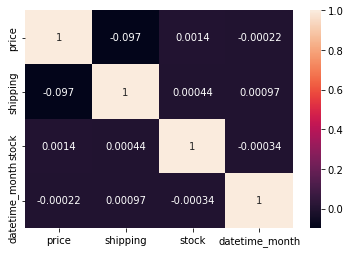

In [ ]:
sns.heatmap(train.corr(), annot=True)

A partir das correlações acima, observa-se que o frete é inversamente proporcionais ao preço.

Copiando o dataset para verificar os valores nulos.

In [ ]:
# Faça uma cópia de trabalho dos dados 
df = train.copy() 
df.isna().sum().loc[df.isna().sum()>0].sort_values()

item_description         4
category_name         6327
datetime_date         6897
datetime_month        6897
brand_name          632682
dtype: int64

In [ ]:
train.shape

(1482535, 13)

* 43% dos registros não tem nomes de marca
* 0,4% dos registros não tem categorias
* 0,0003% não possuí descrição do item

Será excluído os valores nulos, pois as linhas nulas, são insignificantes a quantidade de linhas existentes.

Deixamos as marcas, pois acreditamos que os valores nulos, são importantes para a precificação. Provavelmente usaremos em dummies no modelo, entre com e sem marca e não por marca individualmente.

Filtrando uma marca ‘Apple’ e avaliando os produtos apresentados, entre aparelhos celulares, capinhas, tablets.

In [ ]:
apple = train[train['brand_name'] == 'Apple']


In [ ]:
apple

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_date,datetime_month
26,Otterbox Defender iPhone 6 Plus/6s Plus,1,"Electronics/Cell Phones & Accessories/Cases, C...",Apple,13.0,1,Brand new Otterbox Defender iPhone 6 Plus/6s Plus,2,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",2018-02-18,2.0
149,LIKE NEW IPHONE 5C,2,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,104.0,0,Just Upgraded So Now Finally Getting Rid Of My...,23,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,NaT,NaN
300,Jordan iPhone case only for plus,1,"Electronics/Cell Phones & Accessories/Cases, C...",Apple,5.0,1,JORDAN IPHONE CASE ONLY FOR IPHONE 6 plus iPho...,16,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",2018-12-15,12.0
582,iPhone 6/6s plus cases,3,"Electronics/Cell Phones & Accessories/Cases, C...",Apple,20.0,1,4 iPhone 6/6s plus cases.,7,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",2018-06-26,6.0
757,iPod nano 7th generation,3,"Electronics/TV, Audio & Surveillance/Portable ...",Apple,62.0,1,In perfect working condition. One light scratc...,3,Electronics,"TV, Audio & Surveillance",Portable Audio & Accessories,2018-04-15,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482223,LuMee Duo iPhone 6 Plus 6s Plus 7 Plus,1,"Electronics/Cell Phones & Accessories/Cases, C...",Apple,24.0,1,Black Marble Free Shipping,18,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",2018-02-09,2.0
1482230,iPhone 7 case,1,"Electronics/Cell Phones & Accessories/Cases, C...",Apple,10.0,1,Brand new iPhone 7 glitter case. Protects phon...,5,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",2018-09-14,9.0
1482291,iPhone 7 Plus Case,1,"Electronics/Cell Phones & Accessories/Cases, C...",Apple,7.0,1,Flexible slim glitter bling case new,25,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",2018-07-13,7.0
1482387,IPAD PRO 8.7 INCH 32GB,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,Apple,509.0,0,"BRAND NEW IN BOX NEVER OPEN ,IPAD PRO 32GB,8.9...",1,Electronics,Computers & Tablets,iPad,2018-11-15,11.0


Analisando sobre a sub-categoria2 ‘Cell Phones & Smartphones’, verificamos vários aparelhos, de modelos distintos, preços variados, pois alguns modelos são obsoletos.

In [ ]:
Cell = apple[apple['sub2_cat'] == 'Cell Phones & Smartphones']

In [ ]:
Cell

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_date,datetime_month
149,LIKE NEW IPHONE 5C,2,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,104.0,0,Just Upgraded So Now Finally Getting Rid Of My...,23,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,NaT,NaN
796,iPhone 4,3,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,30.0,1,Black iPhone 4 for Verizon comes with charger,1,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-06-12,6.0
1330,iPhone 6 64gb Gold (Sprint),3,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,305.0,1,Fully functional iPhone 6 64gb Rose Gold. Only...,20,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-07-02,7.0
1536,iPhone 6 Plus,2,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,310.0,1,iPhone 6 Plus US Cellular. Clean ESN. Excellen...,44,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-02-06,2.0
1593,iPhone 5c,3,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,34.0,0,Blue iPhone 5c Screen Was Recently Replaced An...,9,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-04-15,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481376,iPod 5th generation,2,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,15.0,1,This iPod 5th generation is iCloud locked and ...,34,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-12-08,12.0
1481408,IPhone 5s 32gb unlocked,3,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,167.0,1,For sale is an Apple iphone 5S 32GB unlocked. ...,11,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-04-20,4.0
1481709,iPhone 5s Verizon unlocked,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,49.0,0,This phone is iCloud unlocked. It will also ne...,10,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-02-03,2.0
1481811,IPhone 6,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,40.0,0,Activation lock cracked comes with case no cha...,11,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2018-04-14,4.0
